In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, yaml

In [23]:
# folder_name = "data_hd_test"
folder_name = "data_cluster/data"

in_points_path = os.path.join(folder_name, "inside_points.npy")
in_hist_path = os.path.join(folder_name, "in_data.npy")
pos_path = os.path.join(folder_name, "pos.npy")
angle_path = os.path.join(folder_name, "angle.npy")
cfg_path = os.path.join(folder_name, "config.yaml")

in_points = np.load(in_points_path)
in_hist = np.load(in_hist_path)
data = np.load(pos_path)

angle_data = None
if os.path.exists(angle_path):
    angle_data = np.load(angle_path)

with open(cfg_path, "r") as f:
    cfg = yaml.unsafe_load(f)
cfg["run_cfg"].int_cfg.in_pol_checker.update_freq = 1

data.shape

(15129, 30, 2)

In [28]:
# print(in_hist)
print(in_points)

# print(data.shape[1])

# in_points = [[0, 0]]

[]


In [20]:
size = cfg["space_cfg"].size
data_cont = np.zeros_like(data)

data_cont[:,0] = data[:, 0]

for i in range(1, data.shape[1]):
    p_diff = data[:, i] - data[:, i-1]
    
    x_filter = np.abs(p_diff[:,0]) > size/2 
    y_filter = np.abs(p_diff[:,1]) > size/2 
    
    p_diff[x_filter, 0] -= np.copysign(size, p_diff[x_filter, 0]) 
    p_diff[y_filter, 1] -= np.copysign(size, p_diff[y_filter, 1]) 
    
    data_cont[:, i] = data_cont[:, i-1] + p_diff
     

# for ring in data:
#     ring_cont = []
#     for p in rin 
# data[0][0]

In [22]:
# in_points = np.array([[0, 0]])
in_points_1 = in_points[:1]

size = cfg["space_cfg"].size
data_cont = np.zeros_like(data)

data_cont[:,0] = data[:, 0]

for i in range(1, data.shape[1]):
    p_diff = data[:, i] - data[:, i-1]
    
    x_filter = np.abs(p_diff[:,0]) > size/2 
    y_filter = np.abs(p_diff[:,1]) > size/2 
    
    p_diff[x_filter, 0] -= np.copysign(size, p_diff[x_filter, 0]) 
    p_diff[y_filter, 1] -= np.copysign(size, p_diff[y_filter, 1]) 
    
    data_cont[:, i] = data_cont[:, i-1] + p_diff

cm = data_cont.sum(axis=1)/data_cont.shape[1]
x_filter = np.abs(cm[:,0]) > size/2 
y_filter = np.abs(cm[:,1]) > size/2 
cm[x_filter, 0] -= np.copysign(size, cm[x_filter, 0]) 
cm[y_filter, 1] -= np.copysign(size, cm[y_filter, 1]) 

# if (abs(dx) > size * 0.5)
#     dx -= copysign(size, dx);

# if (abs(dy) > size * 0.5)
#     dy -= copysign(size, dy);

diff = cm - in_points_1

x_filter = np.abs(diff[:,0]) > size/2 
y_filter = np.abs(diff[:,1]) > size/2 

diff[x_filter, 0] -= np.copysign(size, diff[x_filter, 0]) 
diff[y_filter, 1] -= np.copysign(size, diff[y_filter, 1]) 

dist = np.sqrt(np.square(diff).sum(axis=1))

ValueError: operands could not be broadcast together with shapes (15129,2) (0,) 

In [79]:
dist.min()

1.3279872580786303

In [12]:
box_size = 40
data_filter = dist < box_size 
rings = data[data_filter]

if angle_data is None:
    angle = np.zeros((rings.shape[0], rings.shape[1]))
else:
    angle = angle_data[data_filter] 

phystem_path = os.path.join(folder_name, "phystem_data")
if not os.path.exists(phystem_path):
    os.mkdir(phystem_path)


np.save(os.path.join(phystem_path, "pos.npy"), rings)
np.save(os.path.join(phystem_path, "angle.npy"), angle)
with open(os.path.join(phystem_path, "config.yaml"), "w") as f:
    yaml.dump(cfg, f)

import shutil
dest = os.path.join(phystem_path, "check_point_metadata.pickle")
shutil.copyfile("./check_point_metadata.pickle", dest)

In [17]:
# rings.shape
# rings

'data_cluster/data_max_windows/phystem_data/check_point_metadata.pickle'

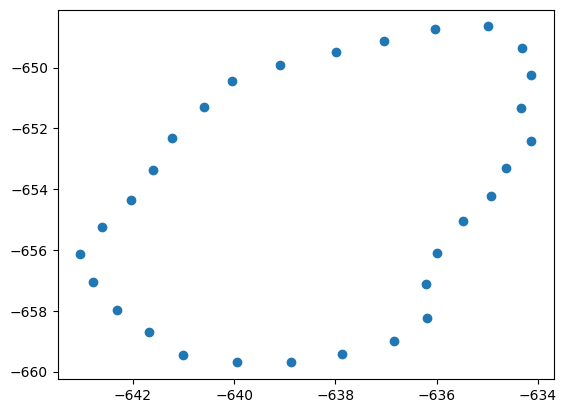

In [77]:
# plt.scatter(*in_points[0], marker="x", c="black", s=50, zorder=2)

for r in data_cont[:1]:
    plt.scatter(*r.T, zorder=1)

In [10]:
n = 4
k = 2

p = np.array([[1, 2]])
# p = np.array([1, 2])

a = np.arange(2*n*k).reshape(k, n, 2)
b = a.sum(axis=1)/n

np.sqrt(np.square(b - p).sum(axis=1))

array([ 2.82842712, 14.14213562])